In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import  preprocessing # used for label encoding and imputing NaNs

In [26]:
claimsdata = pd.read_csv("processedData.csv", parse_dates=['DateOfService', 'FirstBilledDate'])
claimsdata.head()

,Ticket Number,DateOfService,CarrierCode,Charges,Payments,InsurancePayment,PatientPayment,Writeoffs,InsuranceBal,PatientBal,...,CPT,DateOfEntry,PaymentPostDate,NPI,OrderingClinic,DeniedCode,FirstBilledDate,ProviderProfile,CaseCount,accepted
0,104452,2019-01-02,CFHP-E2,3900,0.0,0.0,0.0,0.0,0.0,3900.0,...,81507,1/7/2019,1/22/2019,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,1,False
1,104453,2019-01-02,CFHP-E2,3900,0.0,0.0,0.0,0.0,0.0,3900.0,...,81507,1/7/2019,1/24/2019,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,1,False
2,104454,2019-01-02,NCS,795,249.0,0.0,249.0,546.0,0.0,0.0,...,99999,1/7/2019,2/10/2019,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,NaT,NTINC,1,True
3,104496,2019-01-02,AETLIF-E,3900,0.0,0.0,0.0,0.0,3900.0,0.0,...,81420,1/7/2019,1/28/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,1,True
4,104497,2019-01-02,AETLIF-E,3900,0.0,0.0,0.0,0.0,3900.0,0.0,...,81420,1/7/2019,1/30/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,1,True


In [27]:
claimsdata = claimsdata.loc[claimsdata['accepted'] == False]

In [28]:
claimsdata.shape

(13661, 22)

In [29]:
claimsdata.DeniedCode.unique() #Multiclass Clasification

array(['197', '96', '27', '242', '50', '109', '204', '16', '31', '24',
       '56', '15', '55', '279', '252', '170', 'A1', '256', '133', '198',
       '39', 'B11', '23', '8', '272', '182', '131', '18', '97', '167',
       '231', '222', '216', '234', '5', '200', '226', '129', '206', '208',
       '22', '4', '257', '177', '163', 'B22', '95', '33', '227', 'B5',
       'B7', '26', '243', '104', '140', '185', '62', '119', '49', '11',
       '102', '250', '9', 'P14', '183', '166', 'N52', '151', '10', '150',
       '284', '239', 'B15', '288', '181', 'B97', '148', '146', '32'],
      dtype=object)

In [30]:
pd.set_option('display.max_rows', 500)
pd.value_counts(claimsdata.DeniedCode) #imbalance

197    4091
55     1725
96     1344
252     974
16      943
204     566
97      415
27      329
109     260
A1      239
256     224
133     205
4       201
231     186
50      183
198     127
15      117
B11     113
23      112
P14     104
31       93
272      86
39       84
24       63
222      60
242      58
216      50
185      47
182      42
11       42
243      40
B22      38
8        33
49       32
279      32
22       29
177      27
B5       26
18       25
26       23
227      22
B7       19
56       18
95       18
146      17
10       16
119      16
166      14
226      12
B97      12
167      10
206      10
250       9
62        6
N52       6
234       6
200       6
131       5
170       5
181       4
9         4
5         4
284       3
150       3
151       3
102       3
129       3
183       2
239       2
288       2
148       2
140       2
32        2
B15       2
163       1
208       1
257       1
104       1
33        1
Name: DeniedCode, dtype: int64

In [31]:
# Anything that occurs less than this will be replaced
thresholds = [20,30,40,50,70,100]

indexarr = [None,None,None,None,None,None]
value_counts = claimsdata['DeniedCode'].value_counts() # DenialCode column 
for i in range (6):
    to_replace = value_counts[value_counts <= thresholds[i]].index
    indexarr[i]=to_replace
    claimsdata['DeniedCode'].replace(to_replace, 'other-category-'+str(i+1), inplace=True)
    value_counts = claimsdata['DeniedCode'].value_counts() # DenialCode column 
print(indexarr)

[Index(['B7', '56', '95', '146', '10', '119', '166', '226', 'B97', '167', '206',
       '250', '62', 'N52', '234', '200', '131', '170', '181', '9', '5', '284',
       '150', '151', '102', '129', '183', '239', '288', '148', '140', '32',
       'B15', '163', '208', '257', '104', '33'],
      dtype='object'), Index(['22', '177', 'B5', '18', '26', '227'], dtype='object'), Index(['243', 'B22', '8', '49', '279'], dtype='object'), Index(['216', '185', '182', '11'], dtype='object'), Index(['24', '222', '242'], dtype='object'), Index(['31', '272', '39'], dtype='object')]


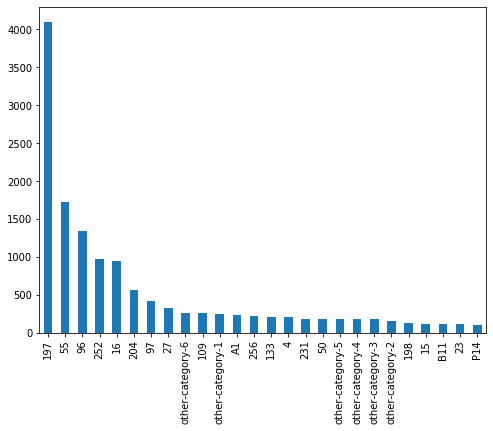

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
claimsdata['DeniedCode'].value_counts().plot.bar(ylim=0)
plt.show()

#imbalanced

Goal: 
    high prediction accuracy: majority class
    reasonable accuracy: minority classes

In [33]:
claimsdata['DeniedCode'].value_counts()

197                 4091
55                  1725
96                  1344
252                  974
16                   943
204                  566
97                   415
27                   329
other-category-6     263
109                  260
other-category-1     251
A1                   239
256                  224
133                  205
4                    201
231                  186
50                   183
other-category-5     181
other-category-4     181
other-category-3     175
other-category-2     152
198                  127
15                   117
B11                  113
23                   112
P14                  104
Name: DeniedCode, dtype: int64

In [34]:
#derived variable timedelta
claimsdata = claimsdata.dropna(subset=['FirstBilledDate']) #dropping down those records there is only few
claimsdata['timedelta'] = (claimsdata['FirstBilledDate'] - claimsdata['DateOfService']).dt.days.astype(int)
claimsdata[['DateOfService', 'FirstBilledDate', 'timedelta']].head()

,DateOfService,FirstBilledDate,timedelta
0,2019-01-02,2019-01-08,6
1,2019-01-02,2019-01-08,6
5,2019-01-02,2019-01-08,6
6,2019-01-02,2019-01-08,6
9,2019-01-02,2019-01-08,6


In [35]:
#Encoding categorical features
#naive approach and assign a numeric value to each categorical feature
#LabelEncoder()

claimsdata['NPI'] = claimsdata['NPI'].astype('object')
for c in claimsdata.columns:
    if (claimsdata[c].dtype == 'object' and c!='DeniedCode'):
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(claimsdata[c].values)) 
        claimsdata[c] = lbl.transform(list(claimsdata[c].values))

In [36]:
claimsdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13661 entries, 0 to 22695
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Ticket Number     13661 non-null  int64         
 1   DateOfService     13661 non-null  datetime64[ns]
 2   CarrierCode       13661 non-null  int64         
 3   Charges           13661 non-null  int64         
 4   Payments          13661 non-null  float64       
 5   InsurancePayment  13661 non-null  float64       
 6   PatientPayment    13661 non-null  float64       
 7   Writeoffs         13661 non-null  float64       
 8   InsuranceBal      13661 non-null  float64       
 9   PatientBal        13661 non-null  float64       
 10  AllowedAmount     13661 non-null  float64       
 11  FinancialClass    13661 non-null  int64         
 12  CPT               13661 non-null  int64         
 13  DateOfEntry       13661 non-null  int64         
 14  PaymentPostDate   1366

In [37]:
#Remove unwanted columns
X_claims = claimsdata.drop(['Ticket Number', 'CaseCount', 'DateOfService', 'FirstBilledDate', 'DeniedCode', 'PaymentPostDate', 'DateOfEntry', 'accepted'], axis=1)
y_claims = claimsdata['DeniedCode']
#split into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X_claims, y_claims, test_size = 0.20)

In [38]:
X_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13661 entries, 0 to 22695
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarrierCode       13661 non-null  int64  
 1   Charges           13661 non-null  int64  
 2   Payments          13661 non-null  float64
 3   InsurancePayment  13661 non-null  float64
 4   PatientPayment    13661 non-null  float64
 5   Writeoffs         13661 non-null  float64
 6   InsuranceBal      13661 non-null  float64
 7   PatientBal        13661 non-null  float64
 8   AllowedAmount     13661 non-null  float64
 9   FinancialClass    13661 non-null  int64  
 10  CPT               13661 non-null  int64  
 11  NPI               13661 non-null  int64  
 12  OrderingClinic    13661 non-null  int64  
 13  ProviderProfile   13661 non-null  int64  
 14  timedelta         13661 non-null  int32  
dtypes: float64(7), int32(1), int64(7)
memory usage: 1.6 MB


In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_test = gnb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)

0.08635199414562751

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

C:\Users\Pubudu.C\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.33296743505305526

In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3,algorithm='ball_tree')
clf.fit(X_train,y_train)
y_pred3 = clf.predict(X_test)
accuracy_score(y_test,y_pred3)

0.6106842297841201

In [42]:
def run_decisionTree(X_train, X_test, y_train, y_test):
    model = tree.DecisionTreeClassifier()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Score: ", model.score(X_test, y_test))

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.metrics import accuracy_score

for index in range(1, 16):
        decisionTreeRFELoop = RFE(tree.DecisionTreeClassifier(max_depth = 5),n_features_to_select = index)
        decisionTreeRFELoop.fit(X_train,y_train)
        X_train_DecisionTree_RFELoop = decisionTreeRFELoop.transform(X_train)
        X_test_DecisionTree_RFELoop = decisionTreeRFELoop.transform(X_test)
        print("selected features:", index)
        run_decisionTree(X_train_DecisionTree_RFELoop, X_test_DecisionTree_RFELoop, y_train, y_test)
        print()

selected features: 1
Score:  0.6527625320160996

selected features: 2
Score:  0.7500914745700695

selected features: 3
Score:  0.752286864251738

selected features: 4
Score:  0.7954628613245518

selected features: 5
Score:  0.8111964873765093

selected features: 6
Score:  0.8294914013904134

selected features: 7
Score:  0.8280278082693011

selected features: 8
Score:  0.8236370289059641

selected features: 9
Score:  0.8880351262349067

selected features: 10
Score:  0.8865715331137943

selected features: 11
Score:  0.8990120746432492

selected features: 12
Score:  0.8993779729235273

selected features: 13
Score:  0.8986461763629711

selected features: 14
Score:  0.8990120746432492

selected features: 15
Score:  0.9015733626051957



In [22]:
#given data set is highly imbalanced

In [21]:
#taking results categorizing many Deniedcodes together may not add much value to the business

In [ ]:
#try with different models such as keras deep learning frameworks in future work